## Toolkit

In [39]:
import pandas as pd

import seaborn as sns

from datasist.structdata import detect_outliers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import joblib

## Import and Inspect data

In [2]:
df = pd.read_csv(r'Data/Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Preprocessing

Useless columns

In [5]:
df.drop(['Email', 'Address', 'Avatar'],axis=1,inplace=True)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


Duplicates

In [6]:
df.duplicated().sum()

0

Missing

In [7]:
df.isna().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Outliers

In [8]:
outliers_indices = detect_outliers(df, 0, df.columns)
outliers_indices

[12,
 154,
 390,
 65,
 309,
 362,
 442,
 69,
 157,
 50,
 151,
 153,
 161,
 173,
 225,
 303,
 379,
 396,
 434,
 447,
 205,
 299,
 368,
 415]

In [9]:
(len(outliers_indices)/df.shape[0])*100

4.8

In [10]:
df.drop(outliers_indices, inplace=True)

In [11]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


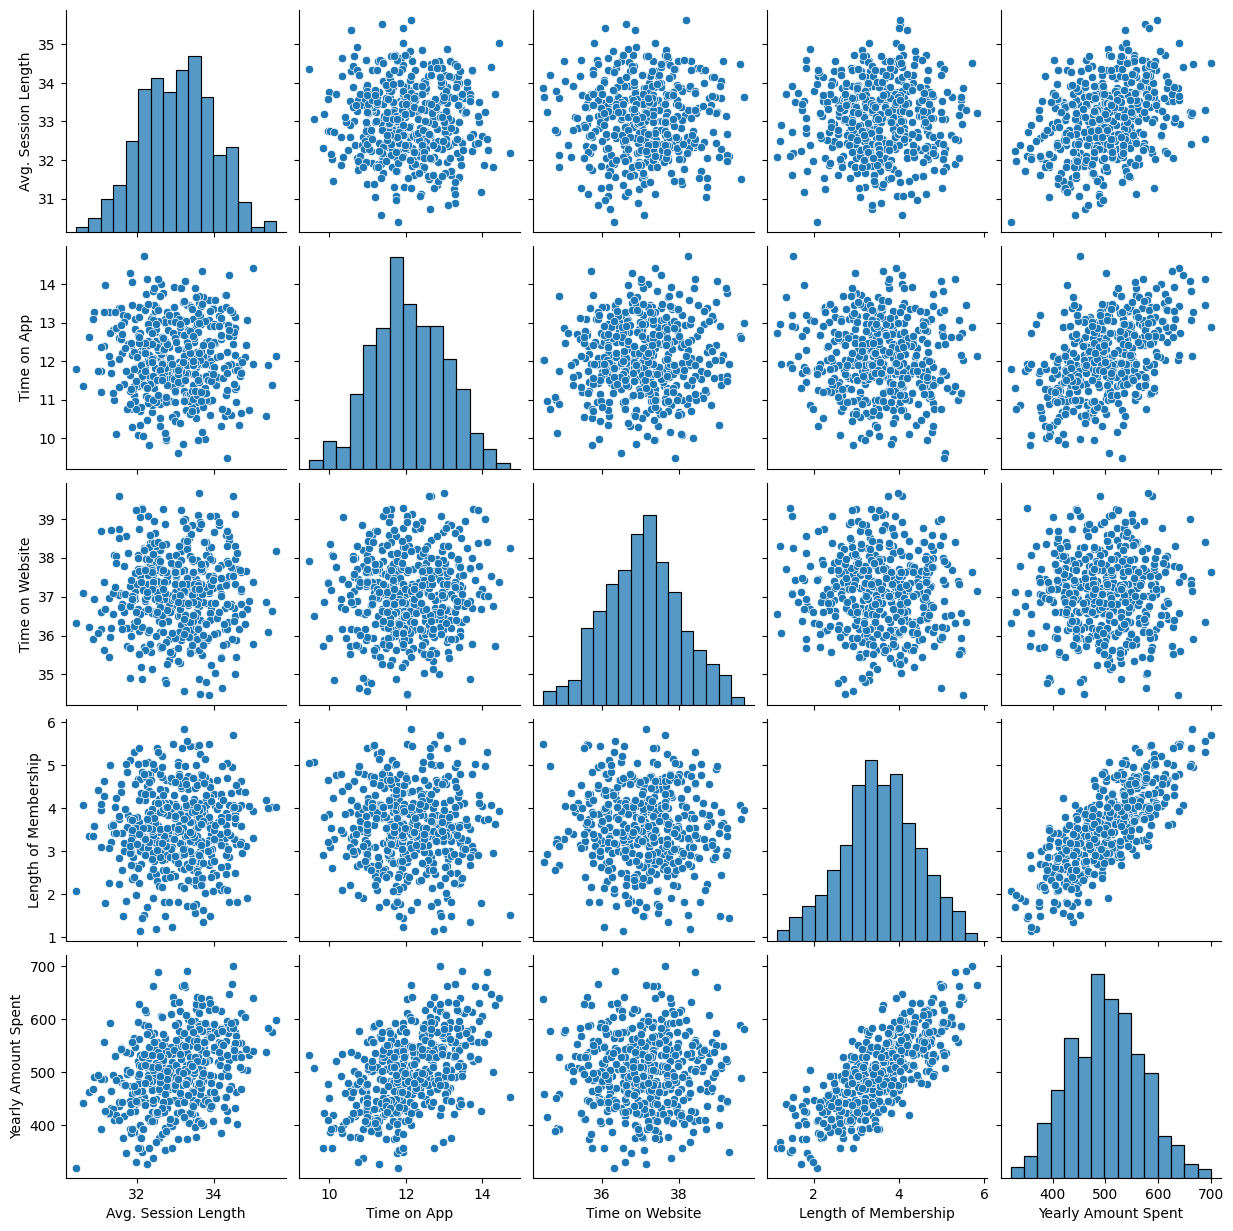

In [12]:
sns.pairplot(df)

## Splitting

In [13]:
x = df.drop('Yearly Amount Spent', axis=1)
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [14]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 476, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
165,32.047801,12.718039,37.661107,3.675849
384,33.593964,11.520567,36.189132,3.561215
104,31.389585,10.994224,38.074452,3.428860
313,33.384111,12.677401,35.622531,3.680847
385,33.236266,10.972554,34.574028,2.931620
...,...,...,...,...
462,33.503810,11.233415,37.211153,2.320550
481,32.047815,12.482670,35.536025,3.393903
41,33.019548,10.634561,37.496690,4.646120
242,34.050947,11.388645,39.081565,2.436959


In [16]:
y_train

165    513.450571
384    474.532329
104    410.069611
313    528.309225
385    414.935061
          ...    
462    397.420584
481    497.389558
41     501.874430
242    451.628611
87     473.728967
Name: Yearly Amount Spent, Length: 380, dtype: float64

In [17]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [18]:
model = LinearRegression()


In [19]:
#Training Step
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_predict = model.predict(x_test)

In [21]:
model.score(x_train, y_train)

0.9781917465907857

In [22]:
#testing
model.score(x_test,y_test)

0.9837608745189981

In [23]:
# Assuming you have a trained model named 'model'
# Save the model to a file using joblib
joblib.dump(model, 'model_filename.pkl')

['model_filename.pkl']

In [24]:
# Load the model from the file
loaded_model = joblib.load('model_filename.pkl')


### OR

In [25]:
features = list(x.columns)

In [26]:
joblib.dump(model,    'model.h5')
joblib.dump(features, 'features.h5')
joblib.dump(scaler,   'scaler.h5')

['scaler.h5']

In [27]:
# pred=model.predict(scaler.transform([[values]]))

# Polynomial regression

In [30]:
poly= PolynomialFeatures(degree=2)

In [31]:
x_train = poly.fit_transform(x_train)
x_test  = poly.fit_transform(x_test)

In [32]:
x_train[0]

array([ 1.        , -1.0601062 ,  0.67041925,  0.59777206,  0.14074881,
        1.12382515, -0.7107156 , -0.63370186, -0.14920869,  0.44946197,
        0.40075789,  0.09436071,  0.35733144,  0.08413571,  0.01981023])

In [33]:
x_test[0]

array([ 1.        ,  0.32506869, -1.55846011,  0.98337535, -0.60237954,
        0.10566965, -0.50660658,  0.31966453, -0.19581472,  2.42879792,
       -1.53255126,  0.93878448,  0.96702708, -0.59236519,  0.36286111])

In [37]:
poly_reg_model = LinearRegression()

In [38]:
poly_reg_model.fit(x_train, y_train)

LinearRegression()

In [36]:
model.score(x_test, y_test)

0.9830011291217403

## Ridge (Noise for overfitting)

In [40]:
model = Ridge()

In [41]:
model.fit(x_train, y_train)

Ridge()

In [42]:
model.score(x_test, y_test)

0.9829221611530811

In [43]:
model.score(x_train, y_train)

0.9786283698070871